In [9]:
%load_ext autoreload
%autoreload 2

import pickle
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import relationship_plots as plot
from scipy import stats
import seaborn as sns
from matplotlib.ticker import MaxNLocator

import mD_vT_relationships as relationships
import sys
sys.path.append('../CPI')
import campaign_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
plt_params = {
    "axes.labelsize": "xx-large",
    "axes.titlesize": "xx-large",
    "xtick.labelsize": "xx-large",
    "ytick.labelsize": "xx-large",
    "legend.title_fontsize": 10,
    "legend.fontsize": 10,
}
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(plt_params)

# LOAD IPAS DATA

In [12]:
"""
variables:
    agg_as = aggregate major radius from fit ellipsoid
    agg_bs = aggregate middle radius from fit ellipsoid
    agg_cs = aggregate minor radius from fit ellipsoid
    Aps = area of projected aggregate polygons in x-y plane
    Acs = area of smallest circle fit around projected aggregate in x-y plane
    Vps = volume of aggregate polygons
    Ves = volume of ellipsoid
    Dmaxs = longest axis from vertex to vertex through 3D polygon
"""
# array shapes = [mono phi, mono r, nclusters, ncrystals]
f = open("../instance_files/mD_vT_vars_rand_1", "rb")
result_rand = pickle.load(f)
f.close()

f = open("../instance_files/mD_vT_vars_flat_1", "rb")
result_flat = pickle.load(f)
f.close()

# LOAD CPI DATA

In [22]:
c = campaign_data.CPI()
c.process_campaigns()
c.make_df()
c.remove_baddata()

### Mass calculated using area vs. volume: <br>

## AREA:
<p> first determine if oblate or prolate for each formed agg (out of 300) for all nm (99):<\p><br>
$rho_i = rho_b * Ar$<br>
oblate:<br>
$m = 4/3 * pi * a^2 * c * rho_i$<br>
prolate:<br>
$m = 4/3 * pi * a * c^2 * rho_i$

## VOLUME:
for a given r_m and phi_m:<br>
$rho_i = rho_b*Vr$<br>
no need to find prolate/oblate <br>
$m = 4/3 * pi * a * b * c *rho_i$   [kg] <br>

<p> only finding mode of m after calculating rho_i for each n and nm </p>
<p> converting Aps, Acs, Vps, ,and Ves into [m]</p>
    

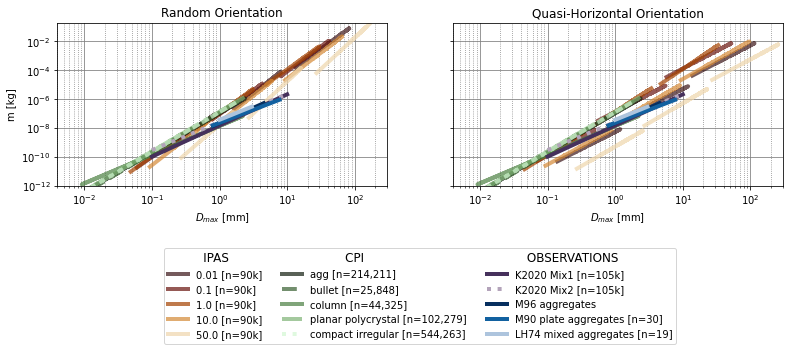

In [26]:
# RANDOM ORIENTATION
# convert dict keys to variables
locals().update(result_rand)

phi_idxs = [0, 1, 2, 3, 4]
r_idxs = [0, 1, 2]
# if using volume ratios for mass:
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,7), sharey=True, sharex=True)
#else:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,3), sharey=True, sharex=True)

# RANDOM ORIENTATION
p = plot.Plots(ax1, c.df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
ylabel='m [kg]'
title='Random Orientation'
p.m_D_plot(title, ylabel, mflag = 'area', result_rand=True)

# QUASI-HORIZONTAL ORIENTATION
locals().update(result_flat)
p = plot.Plots(ax2, c.df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
ylabel=''
title='Quasi-Horizontal Orientation'
p.m_D_plot(title, ylabel, mflag = 'area', result_rand=False)

# # RANDOM ORIENTATION
# locals().update(result_rand)
# p = plot.Plots(ax3, c.df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
# ylabel='m [kg]'
# title='\nCalculated Mass using Vr'
# p.m_D_plot(title, ylabel,  mflag = 'vol', result_rand=True)

# # QUASI-HORIZONTAL ORIENTATION
# locals().update(result_flat)
# p = plot.Plots(ax4, c.df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
# ylabel=''
# title='\nCalculated Mass using Vr'
# p.m_D_plot(title, ylabel, mflag = 'vol', result_rand=False)

#plt.savefig('../plots/m_D_relationship.png', bbox_inches='tight')

USING HEYMSFIELD'S METHOD


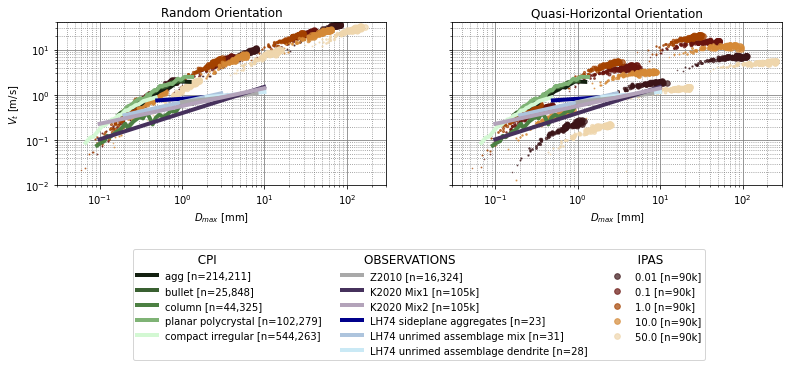

In [30]:
phi_idxs = [0,1,2,3,4]
r_idxs = [0, 1, 2]

# if using volume ratios for mass:
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14,7), sharey=True, sharex=True)
#else:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,3), sharey=True, sharex=True)

#which method of equations to follow:
study = 'Heymsfield'

# RANDOM ORIENTATION
locals().update(result_rand)
p = plot.Plots(ax1, c.df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
ylabel = "$V_t$ [m/s]"
title='Random Orientation'
p.vt_plot(title, ylabel, mflag = 'area', study=study, result_rand=True)

# QUASI-HORIZONTAL ORIENTATION
locals().update(result_flat)
p = plot.Plots(ax2, c.df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
title = f"Quasi-Horizontal Orientation"
ylabel = " "
p.vt_plot(title, ylabel, mflag = 'area',  study=study, result_rand=False)

# # RANDOM ORIENTATION
# locals().update(result_rand)
# p = plot.Plots(ax3, c.df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
# ylabel = "$V_t$ [m/s]"
# title='\nCalculated Mass using Vr'
# p.vt_plot(title, ylabel,  mflag = 'vol', study=study, result_rand=True)

# # QUASI-HORIZONTAL ORIENTATION
# locals().update(result_flat)
# p = plot.Plots(ax4, c.df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
# ylabel = " "
# title='\nCalculated Mass using Vr'
# p.vt_plot(title, ylabel, mflag = 'vol',  study=study, result_rand=False)


if study == 'Mitchell':
    print("USING MITCHELL'S METHOD")
elif study == 'Heymsfield':
    print("USING HEYMSFIELD'S METHOD")
elif study =='Heymsfield2002':
    print("USING HEYMSFIELD'S 2002 METHOD")

#plt.savefig(f'../plots/vt_{study}.png', bbox_inches='tight')

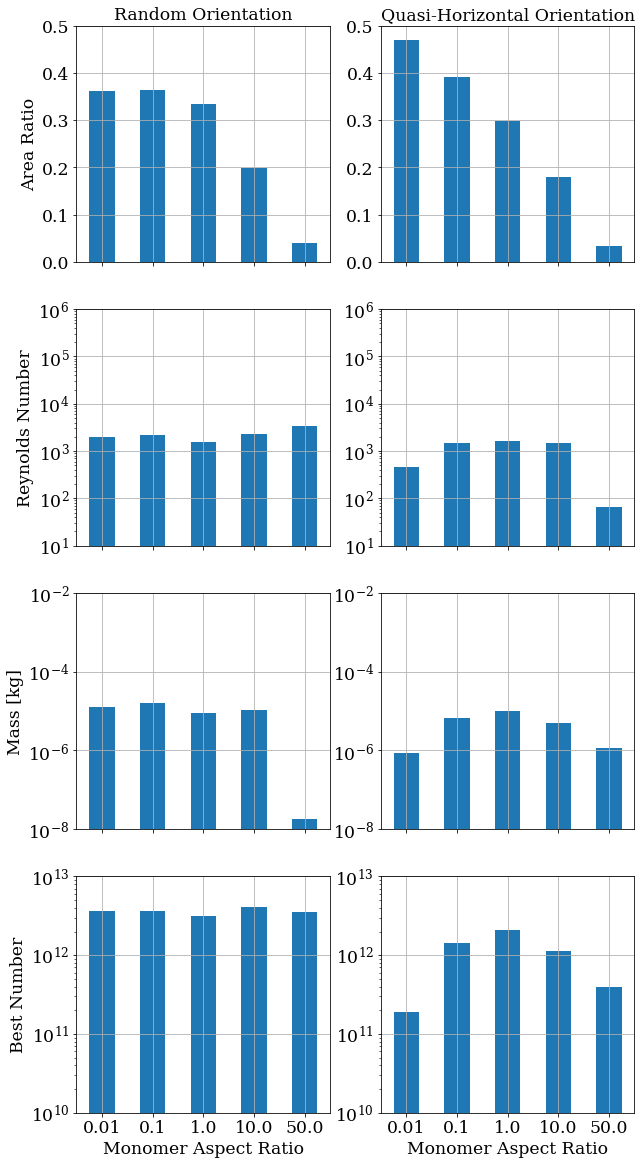

In [6]:
phi_idxs = [0, 1, 2, 3, 4]
r_idxs = [0,1,2]
r_idx = 1
fig,axs = plt.subplots(4, 2, figsize=(10, 20), sharex=True)
axs = axs.ravel()

locals().update(result_rand)
p = plot.Plots(axs[0], df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = r_idx  # index of monomer radius
title = f"Random Orientation"
# xlabel = "Monomer Aspect Ratio"
xlabel = ""
p.area_ratio_plot(title, xlabel, result_rand=True)

# QH ORIENTATION
# convert dict keys to variables
locals().update(result_flat)
p = plot.Plots(axs[1], df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
title = f"Quasi-Horizontal Orientation"
p.r_idx = r_idx  # index of monomer radius
xlabel = ""
p.area_ratio_plot(title, xlabel, result_rand=False)
#ax2.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

locals().update(result_rand)
p = plot.Plots(axs[2], df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = r_idx  # index of monomer radius
# title = f"Random Orientation\n {nm+1} monomers"
title = ""
xlabel = "Monomer Aspect Ratio"
p.Re_plot(title, xlabel, result_rand=True)

locals().update(result_flat)
# title = f"Quasi-Horizontal Orientation\n {nm+1} monomers"
title = ""
xlabel = "Monomer Aspect Ratio"
p = plot.Plots(axs[3], df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = r_idx  # index of monomer radius
p.Re_plot(title, xlabel, result_rand=False)
# ax2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

locals().update(result_rand)
p = plot.Plots(axs[4], df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = r_idx  # index of monomer radius
title = f" "
# xlabel = "Monomer Aspect Ratio"
xlabel = ""
p.mass_plot(title, xlabel, result_rand=True)

# QH ORIENTATION
# convert dict keys to variables
locals().update(result_flat)
p = plot.Plots(axs[5], df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
title = f" "
p.r_idx = r_idx  # index of monomer radius
xlabel = ""
p.mass_plot(title, xlabel, result_rand=False)
#ax2.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))

locals().update(result_rand)
p = plot.Plots(axs[6], df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = r_idx  # index of monomer radius
# title = f"Random Orientation\n {nm+1} monomers"
title = ""
xlabel = ""
p.best_number_plot(title, xlabel, result_rand=True)

locals().update(result_flat)
# title = f"Quasi-Horizontal Orientation\n {nm+1} monomers"
title = ""
xlabel = ""
p = plot.Plots(axs[7], df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = r_idx  # index of monomer radius
p.best_number_plot(title, xlabel, result_rand=False)
# ax2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
plt.savefig(f'../plots/vt_vars_phi_orientation.png', bbox_inches='tight')

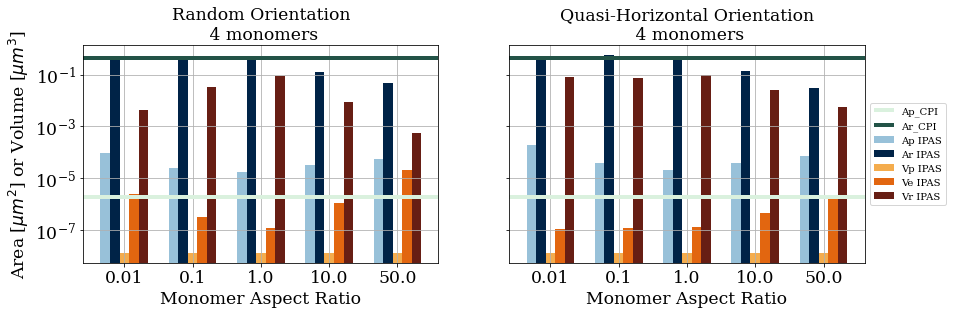

In [182]:
# convert dict keys to variables
locals().update(result_rand)

phi_idxs = [0, 1, 2, 3, 4]
nm = 3  # plot after how many monomers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4), sharey=True)
p = plot.Plots(ax1, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = 2  # index of monomer radius
p.nm = nm  # plot after how many monomers
title = f"Random Orientation\n {nm+1} monomers"
xlabel = "Monomer Aspect Ratio"
p.area_plot(title, xlabel, nm)

locals().update(result_flat)
title = f"Quasi-Horizontal Orientation\n {nm+1} monomers"
xlabel = "Monomer Aspect Ratio"
p = plot.Plots(ax2, df_CPI, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.r_idx = 2  # index of monomer radius
p.nm = nm  # plot after how many monomers
p.area_plot(title, xlabel, nm)
ax2.legend(loc="center left", bbox_to_anchor=(1.0, 0.5));